### Introduction to neural network classification with tensorflow

In this notebook we're going to learn how to write neural networks for classification problems

A classification is where you try to classify something as one thing or other.

A few types of classification problems:
1. Binary classification
2. Multilevel classification
3. Multilabel classification

### Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles
#Make 1000 examples
n_samples = 1000
# Create circle
X,y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
#Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

### Our data is litte hard to understand right now... let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1" : X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

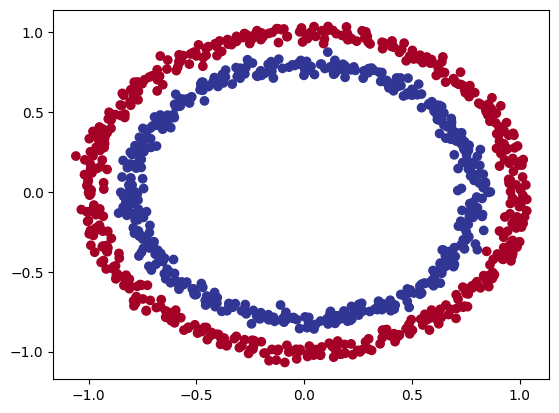

In [ ]:
#Visualoze with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
#Check the shapes of our functions and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many ssamples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in Modelling


The steps in modelling with tensorflow are typically:
1. create or import a model
2. compile the model
3. fit the model
4. Evaluate the model
5. tweak
6. Evaluate

In [ ]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),

])

#Compile the model
model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# fit the model
model.fit(X,y, epochs=5)



Epoch 1/5
32/32 [==============================] - 2s 3ms/step - loss: 3.7074 - accuracy: 0.5070
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 0.1838 - accuracy: 0.4590
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.4860
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1738 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.4870


In [ ]:
#let's try and improve our model by training for longer...
model.fit(X,y, epochs=200, verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1735 - accuracy: 0.5000


[0.17345525324344635, 0.5]

### Since we're working on a binary classification problem and our model is getting around ~50% accuracy... It's performing as if it's guessing

Let's set things up a notch and add an extra layer

In [ ]:
# Set the random seed
tf.random.set_seed(42)
# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])
# Fit the model
model_2.fit(X,y, epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693245530128479, 0.5]

### Improving our model

Let's look into our bag of tricks to see how we can improve our models.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model =- here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs(leave it training for longer).

In [ ]:
#Set the random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

#compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
model_3.fit(X,y, epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.5090


[0.6986473798751831, 0.5090000033378601]

In [ ]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.47928286],
       [0.5698041 ],
       [0.57443005],
       [0.5723547 ],
       [0.44616312],
       [0.57694465],
       [0.55380607],
       [0.47430497],
       [0.48910117],
       [0.5706954 ],
       [0.53022087],
       [0.5193818 ],
       [0.56160265],
       [0.4542266 ],
       [0.45069027],
       [0.4680853 ],
       [0.5579301 ],
       [0.47188705],
       [0.561839  ],
       [0.52081716],
       [0.4974119 ],
       [0.5903603 ],
       [0.47041935],
       [0.48237044],
       [0.5935015 ],
       [0.58323026],
       [0.5433057 ],
       [0.45685983],
       [0.4637922 ],
       [0.45282727],
       [0.49301863],
       [0.5757571 ],
       [0.55150855],
       [0.45344275],
       [0.4713428 ],
       [0.596708  ],
       [0.5775356 ],
       [0.5208763 ],
       [0.46441704],
       [0.49894798],
       [0.5166793 ],
       [0.53663427],
       [0.52839774],
       [0.45230156],
       [0.5404131 ],
       [0.5559831 ],
       [0.45144123],
       [0.537

#To visualize our model's prediction, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique call falls)



In [ ]:
import numpy as np

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create x value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multiclass
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()



313/313 [==============================] - 0s 1ms/step
Doing binary classification


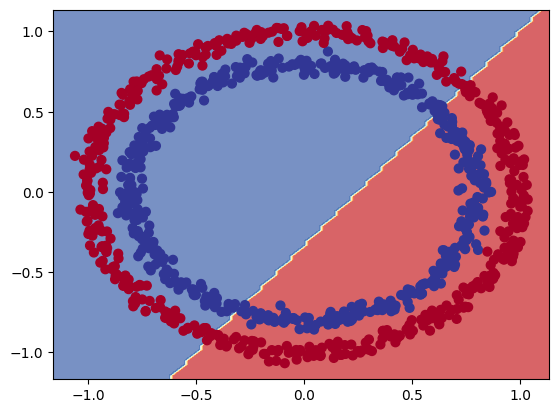

In [ ]:
#Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)